In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df_train.shape, df_test.shape

((8693, 14), (4277, 13))

In [3]:
print("Распределение классов, %:")
df_train["Transported"].value_counts(normalize=True) * 100

Распределение классов, %:


Transported
True     50.362361
False    49.637639
Name: proportion, dtype: float64

In [4]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df_train[["Group", "ID"]] = df_train['PassengerId'].str.split('_', expand=True)
df_train[["Deck#1", "Deck#2", "Deck#3"]] = df_train['Cabin'].str.split('/', expand=True)
# df_train = df_train.drop(columns=['Name', 'Cabin'])


df_test[["Group", "ID"]] = df_test['PassengerId'].str.split('_', expand=True)
df_test[["Deck#1", "Deck#2", "Deck#3"]] = df_test['Cabin'].str.split('/', expand=True)
# df_train = df_train.drop(columns=['Name', 'Cabin'])

In [6]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,ID,Deck#1,Deck#2,Deck#3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


In [7]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Group            object
ID               object
Deck#1           object
Deck#2           object
Deck#3           object
dtype: object

In [8]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Group             0
ID                0
Deck#1          199
Deck#2          199
Deck#3          199
dtype: int64

In [10]:
# df_train = df_train.dropna(how='any')
df_train = df_train.fillna(method='ffill')
# df_test = df_test.dropna(how='any')
df_test = df_test.fillna(method='ffill')

/tmp/ipykernel_42/4227464721.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train = df_train.fillna(method='ffill')
/tmp/ipykernel_42/4227464721.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test = df_test.fillna(method='ffill')


In [11]:
df_train.shape, df_test.shape

((6606, 19), (4277, 18))

In [12]:
categorical_clmn = df_train.select_dtypes(include='object').columns.tolist()
float_clmn = df_train.select_dtypes(include='float').columns.tolist()
float_clmn

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [13]:
print(float_clmn + (["Transported"]))

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


3327
           Deck#1                  Deck#3                 CryoSleep         \
            count unique top  freq  count unique top freq     count unique   
HomePlanet                                                                   
Earth        1518      3   G  1028   1518      2   S  864      1518      2   
Europa       1104      6   B   458   1104      2   S  646      1104      2   
Mars          705      3   F   565    705      2   P  355       705      2   

                       Destination                           
              top freq       count unique          top freq  
HomePlanet                                                   
Earth       False  800        1518      3  TRAPPIST-1e  940  
Europa       True  716        1104      3  TRAPPIST-1e  603  
Mars         True  471         705      3  TRAPPIST-1e  593  
3279
           Deck#1                 Deck#3                  CryoSleep         \
            count unique top freq  count unique top  freq     count uni

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HomePlanet', ylabel='Count'>

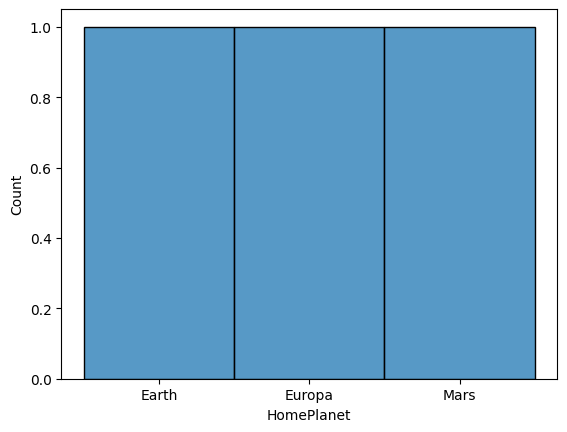

In [31]:
print((df_train['Transported']==True).sum())
print(df_train[df_train['Transported'] == True].groupby('HomePlanet')[['Deck#1','Deck#3', 'CryoSleep', 'Destination']].describe())
dt = df_train[df_train['Transported'] == True].groupby('HomePlanet')['Deck#1'].describe()
# print(df_train[df_train['Transported'] == False].groupby('HomePlanet')[['Deck#1', 'CryoSleep']].describe())

print((df_train['Transported']==False).sum())
print(df_train[df_train['Transported'] == False].groupby('HomePlanet')[['Deck#1','Deck#3', 'CryoSleep', 'Destination']].describe())
sns.histplot(data = dt , x = 'HomePlanet')

# df_train.groupby(['Transported'])['HomePlanet'].describe()

# df_train.groupby(['HomePlanet'])['Transported'].transform('median')

# males = df.query(" gender == 'Male' ")
# males.groupby('nose_wide')['nose_wide'].describe()

# print(df.groupby(['housing', 'loan'])['y'].mean(), end='\n\n')

# print("4.2 What is the min, max, average and std values of age among people who have \
#       housing loans (housing)? The answer shold be given in descending order? - ", \
#     np.round(df.groupby('housing')["age"].describe()[['max','min', 'mean', 'std']], 3).tail(1))

## **Correlation Matrix with Heatmap**

<Axes: >

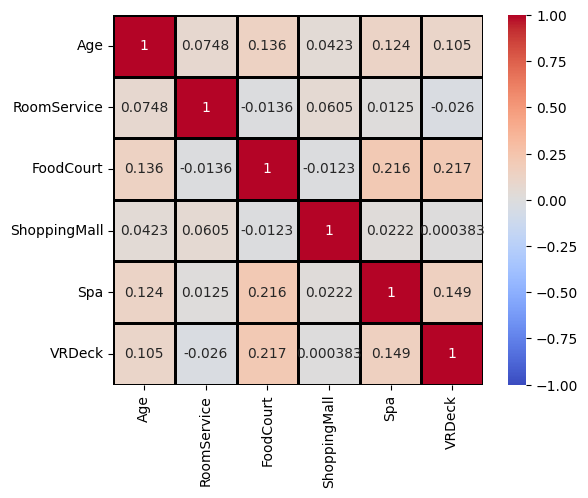

In [13]:
sns.heatmap(df_train[float_clmn].corr(),fmt = '.3g',square=True, 
            annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

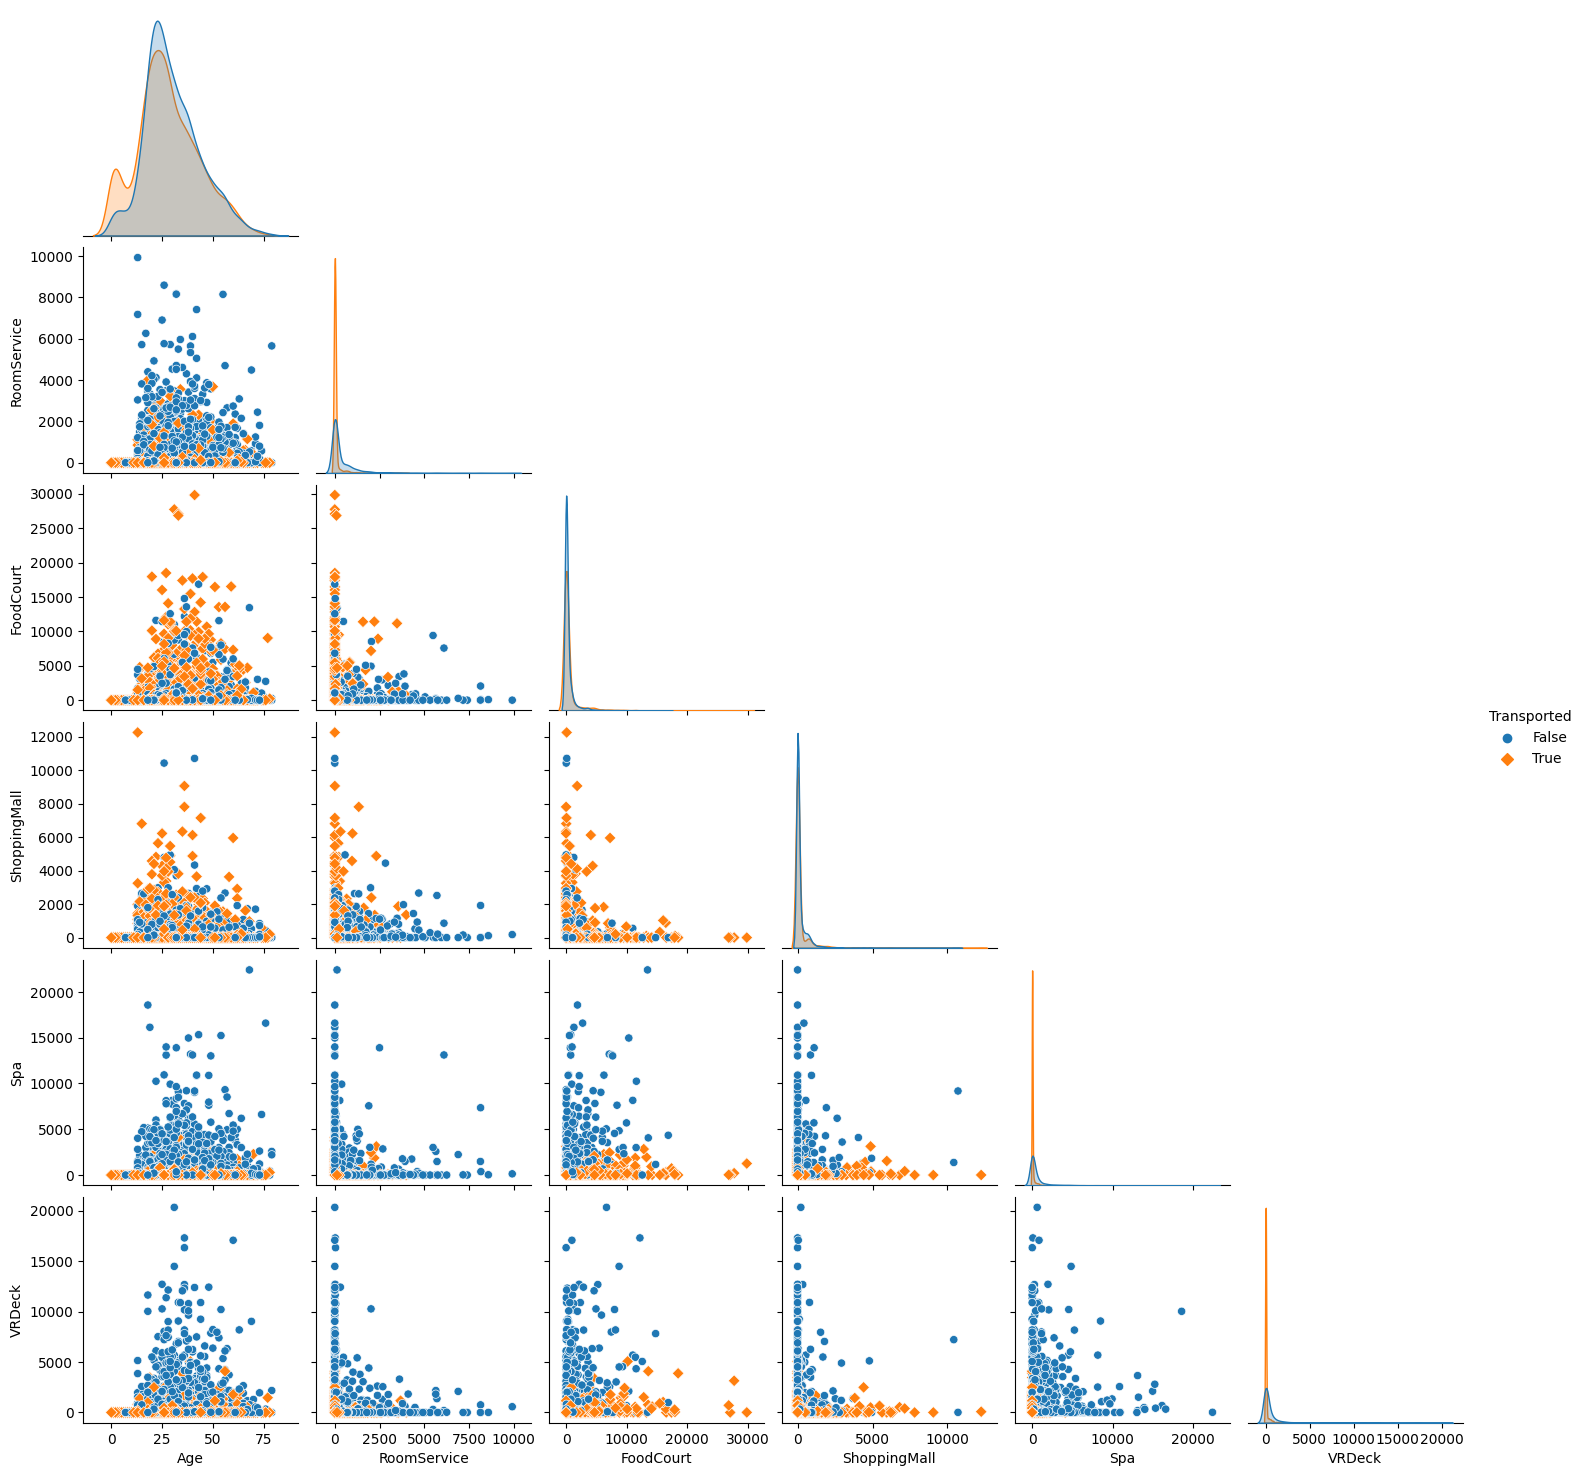

In [14]:
sns.pairplot(data=df_train[float_clmn].join(df_train["Transported"]), 
             hue="Transported", corner=True, markers=["o", "D"])

In [15]:
df_train['Ad_servece'] =  df_train[['RoomService', 'FoodCourt', \
                                    'ShoppingMall', 'Spa', 'VRDeck']].apply(sum, axis=1)
df_train['Deck#1_is_sleep'] = df_train.groupby(['Deck#1'])['CryoSleep'].transform(lambda x: x == 1)

df_train['is_Earth_Deck#3'] = df_train[['HomePlanet', 'Deck#3']].apply(lambda x: True if ((x.iloc[0] == 'Earth') & (x.iloc[1]=='P')) else False, axis=1)
df_train['is_Europa_Sleep'] = df_train[['HomePlanet', 'CryoSleep']].apply(lambda x: True if ((x.iloc[0] == 'Europa') & (x.iloc[1]==True)) else False, axis=1)
df_train['is_Mars_Sleep'] = df_train[['HomePlanet', 'CryoSleep']].apply(lambda x: True if ((x.iloc[0] == 'Mars') & (x.iloc[1]==True)) else False, axis=1)

# df["high_class"] = df[["grade", "condition"]].apply(lambda x: True if ((x[0] >=9) & (x[1]>=4)) else False, axis=1)

In [16]:
df_train.tail(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Group,ID,Deck#1,Deck#2,Deck#3,Ad_servece,Deck#1_is_sleep,is_Earth_Deck#3,is_Europa_Sleep,is_Mars_Sleep
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,9276,01,A,98,P,8536.0,False,False,False,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,9278,01,G,1499,S,0.0,True,False,False,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,9279,01,G,1500,S,1873.0,False,False,False,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,9280,01,E,608,S,4637.0,False,False,False,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,...,9280,02,E,608,S,4826.0,False,False,False,False


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV

### train
X_train, y_train = df_train[['HomePlanet', 'CryoSleep', 'Destination',\
                             'Deck#1', 'Deck#3', 'Ad_servece', 'Deck#1_is_sleep',\
                             'is_Earth_Deck#3', 'is_Europa_Sleep', 'Age', 'is_Mars_Sleep']].copy(), \
df_train["Transported"].copy()
# ### test
# X_test = df_test[['HomePlanet', 'CryoSleep', 'Destination', 'Age',\
#        'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',\
#                  'Group', 'ID', 'Deck#1', 'Deck#2', 'Deck#3']].copy()

### Additional train
X, y = X_train, y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# from sklearn.model_selection import train_test_split, GridSearchCV

# ### train
# X_train, y_train = df_train[['HomePlanet', 'CryoSleep', 'Destination', 'Age',\
#        'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',\
#                  'Group', 'ID', 'Deck#1', 'Deck#2', 'Deck#3']].copy(), df_train["Transported"].copy()
# ### test
# X_test = df_test[['HomePlanet', 'CryoSleep', 'Destination', 'Age',\
#        'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',\
#                  'Group', 'ID', 'Deck#1', 'Deck#2', 'Deck#3']].copy()

# ### Additional train
# # X, y = X_train, y_train
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
X_train.head(5)

,HomePlanet,CryoSleep,Destination,Deck#1,Deck#3,Ad_servece,Deck#1_is_sleep,is_Earth_Deck#3,is_Europa_Sleep,Age,is_Mars_Sleep
5450,Mars,True,55 Cancri e,D,S,0.0,True,False,False,21.0,True
1344,Europa,True,TRAPPIST-1e,B,S,0.0,True,False,True,39.0,False
8322,Earth,False,55 Cancri e,G,S,620.0,False,False,False,58.0,False
3239,Earth,True,TRAPPIST-1e,G,P,0.0,True,True,False,25.0,False
4704,Europa,False,55 Cancri e,C,S,7503.0,False,False,False,35.0,False


## **Preprocessing**

In [20]:
# Preprocessing for categorical data
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

### train
for i in X_train.select_dtypes(exclude='float').columns:
    X_train[i]= label_encoder.fit_transform(X_train[i])
    
    
### test
for i in X_test.select_dtypes(exclude='float').columns:
    X_test[i]= label_encoder.fit_transform(X_test[i])

In [21]:
# Normalization of numerical data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
features = X_train.select_dtypes(include='float').columns

### train
X_train[features] = scaler.fit_transform(X_train[list(features)])
### test
X_test[features] = scaler.fit_transform(X_test[list(features)])

In [22]:
X_train.nunique()

HomePlanet            3
CryoSleep             2
Destination           3
Deck#1                8
Deck#3                2
Ad_servece         1453
Deck#1_is_sleep       2
is_Earth_Deck#3       2
is_Europa_Sleep       2
Age                  79
is_Mars_Sleep         2
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

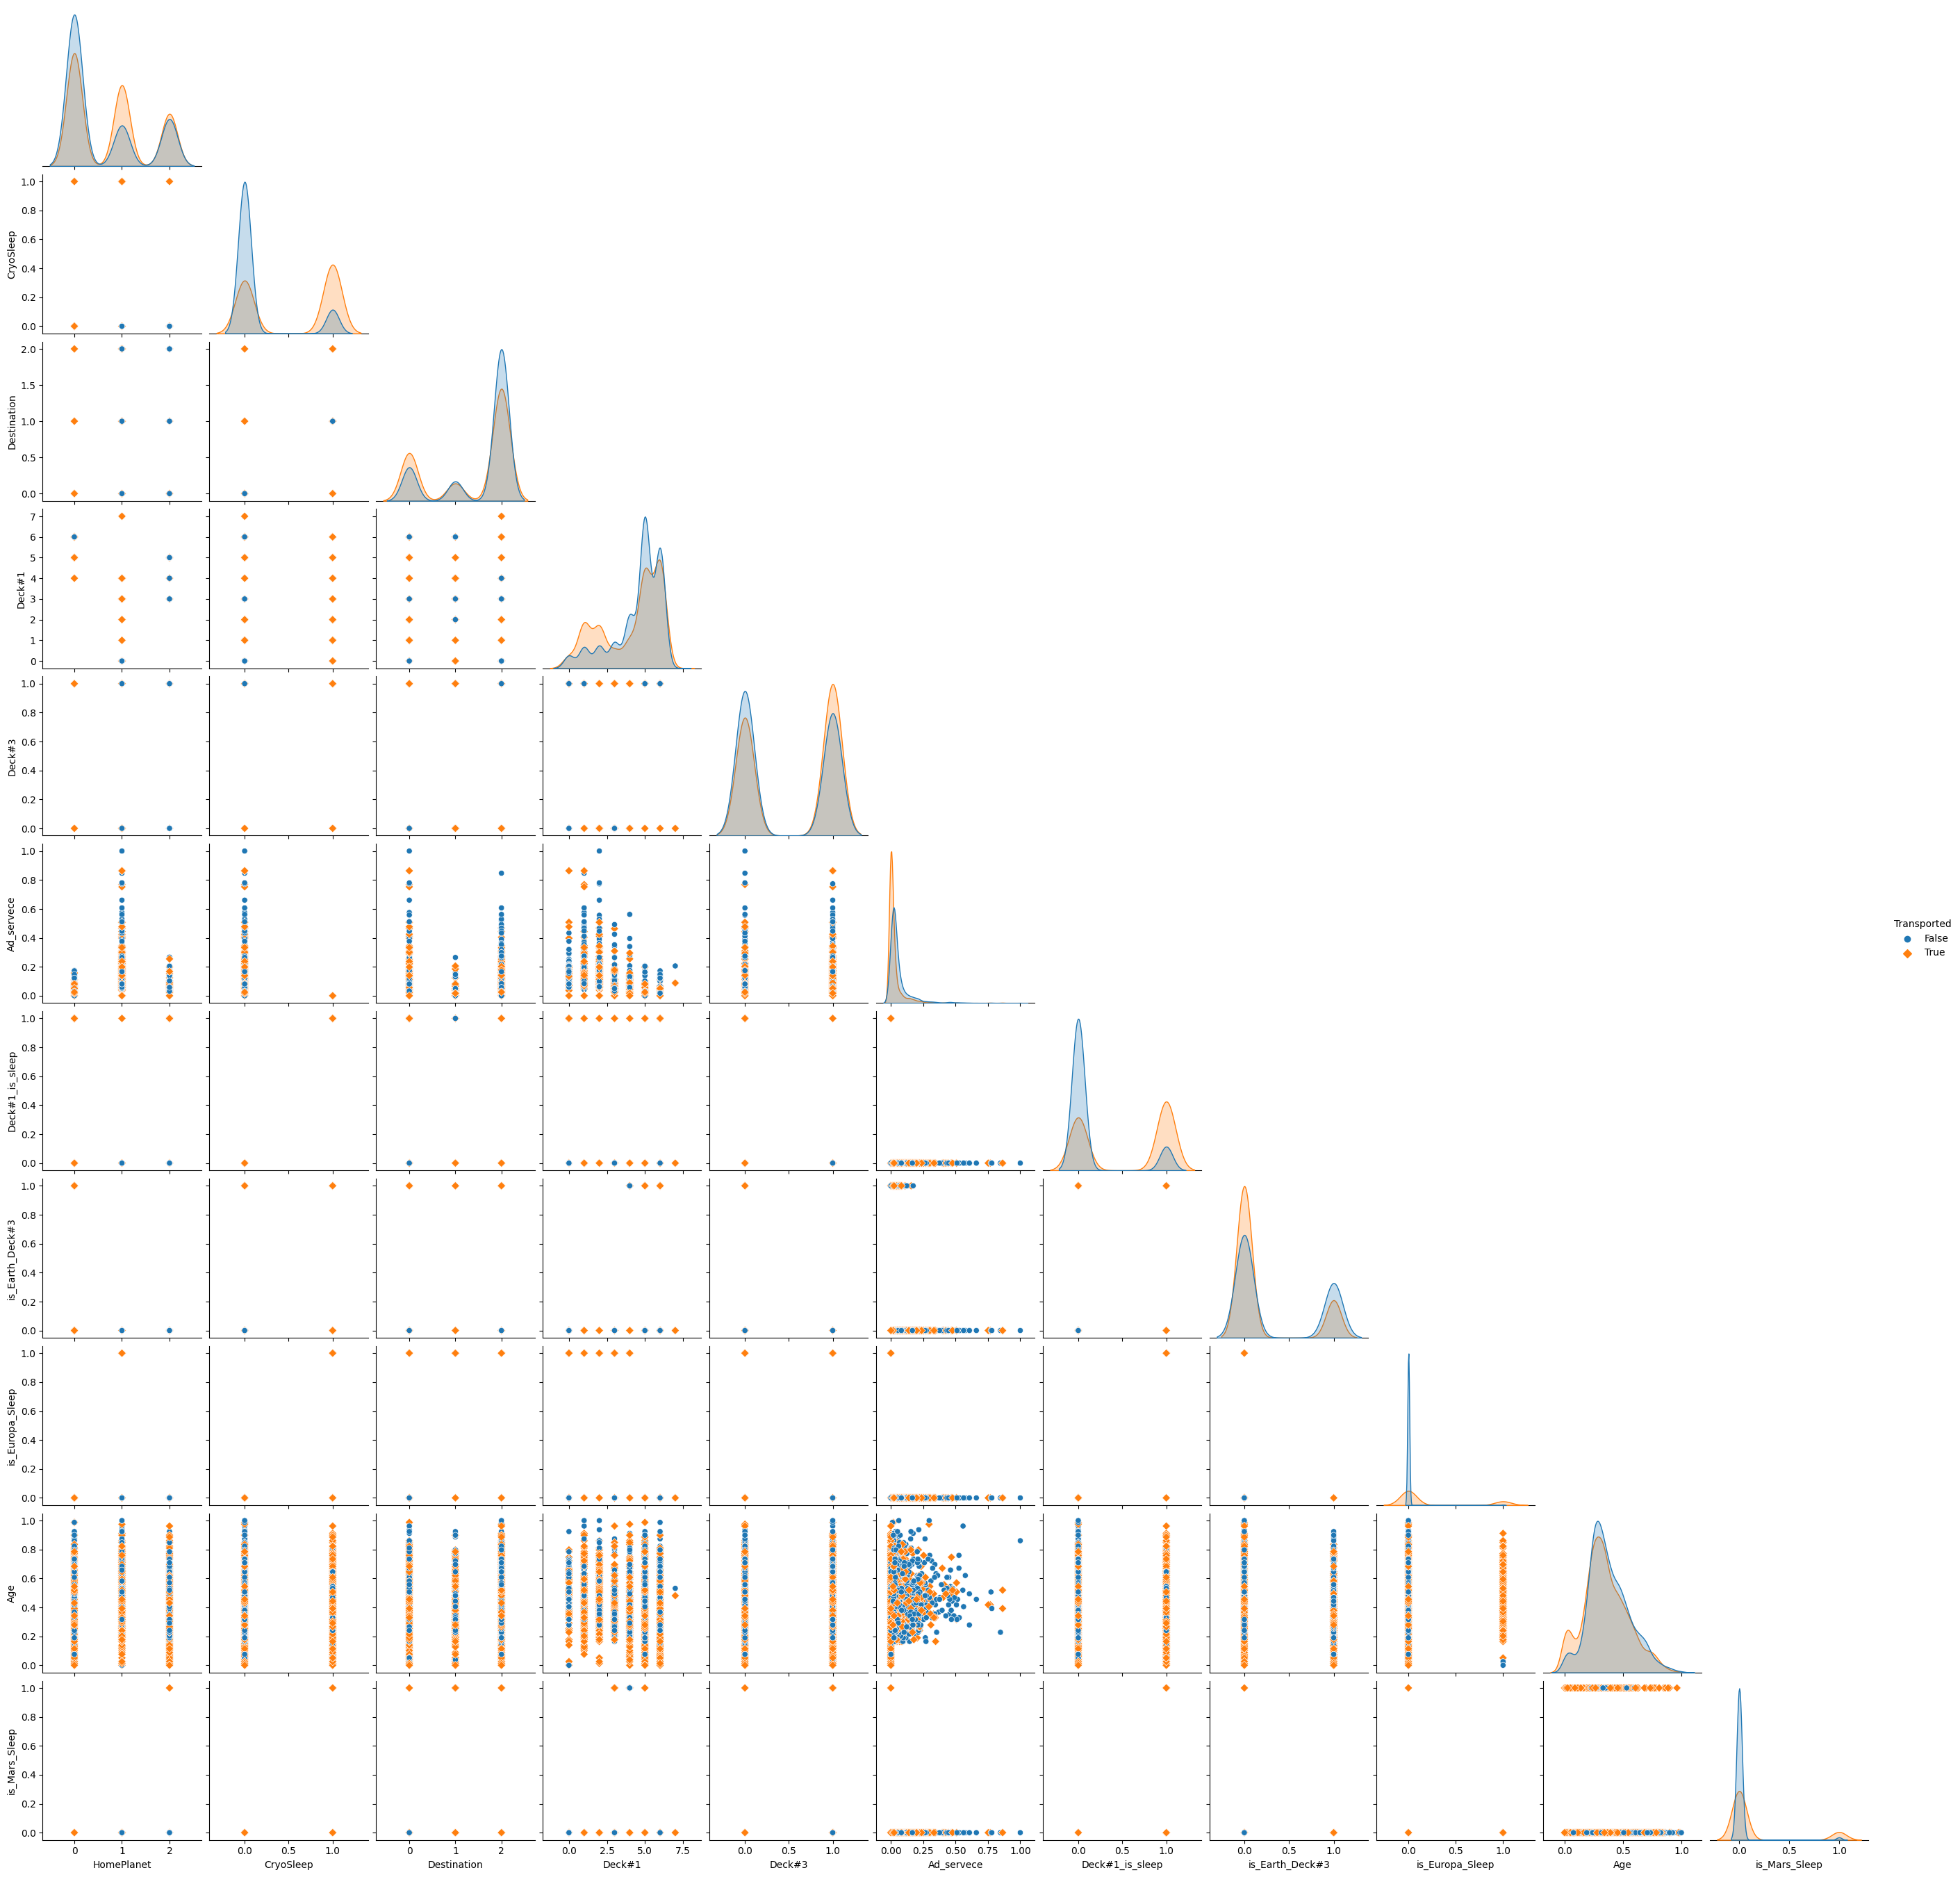

In [23]:
sns.pairplot(data=X_train.join(y_train), 
             hue="Transported", corner=True, markers=["o", "D"])

<Axes: >

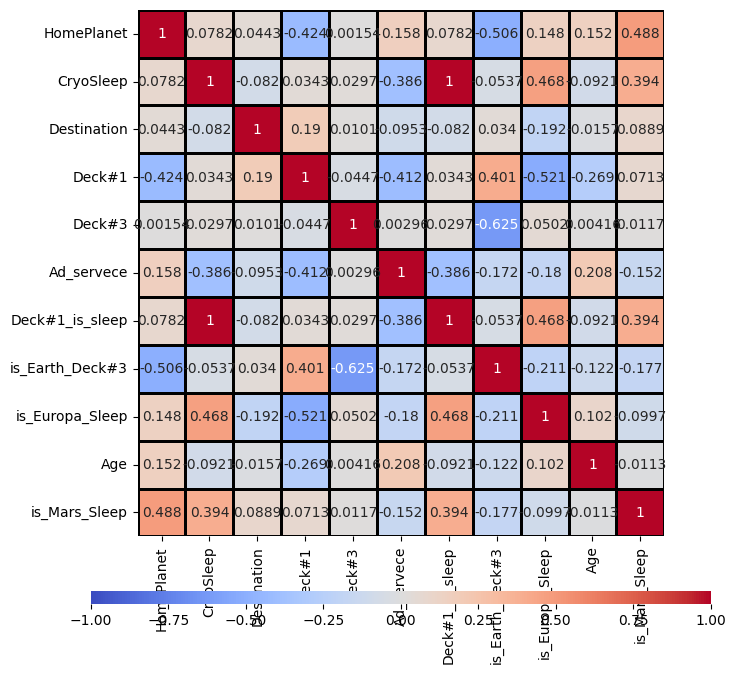

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
fig1, ax = plt.subplots(figsize=(8, 8))
fig1.subplots_adjust(top=.965)

cbar_kws = {'orientation':"horizontal", 'pad':0.08, 'aspect':50}
sns.heatmap(X_train.corr(),fmt = '.3g',square=True, 
            annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', 
            linewidths=1, linecolor='black',
           cbar_kws=cbar_kws)

### **Feature selection**

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

anova = SelectKBest(score_func=f_classif, k=3)
anova.fit(X_train, y_train)
print("Three most important features by anova with f classifier: ",\
      (anova.get_feature_names_out()))

### chi2 - only for positive value
chi2 = SelectKBest(score_func=chi2, k=3)
chi2.fit(X_train, y_train)
print("Three most important features by chi2 classifier: ",\
      (chi2.get_feature_names_out()))

Three most important features by anova with f classifier:  ['CryoSleep' 'Deck#1_is_sleep' 'is_Europa_Sleep']
Three most important features by chi2 classifier:  ['CryoSleep' 'Deck#1_is_sleep' 'is_Europa_Sleep']


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

### **Logistic Regression**

In [53]:
params_grid_log_reg = {"C": np.logspace(-7, 7, 10),
                        "penalty": ['l2'], 
                       "solver": ['newton-cg', 'newton-cholesky', 'lbfgs']
                      }



logreg_cv = GridSearchCV(LogisticRegression(
                                            max_iter=500),
                           params_grid_log_reg,
                           cv=5)

# params_grid_log_reg = {"C": np.logspace(-2, 4, 7)}

# logreg_cv = GridSearchCV(LogisticRegression(penalty='l1',
#                                             solver='liblinear',
#                                             max_iter=100),
#                            params_grid_log_reg,
#                            cv=5)

In [54]:
logreg_cv.fit(X_train, y_train)
logreg_cv.predict(X_test)
print("An optimal hyperparametrs: ", logreg_cv.best_estimator_)
print("Accuracy: ", logreg_cv.best_score_)

An optimal hyperparametrs:  LogisticRegression(C=215.44346900318865, max_iter=500)
Accuracy:  0.7193850352629095


In [55]:
from sklearn.metrics import accuracy_score

logreg_cv.best_estimator_.fit(X_train, y_train)
logreg_cv.best_estimator_.predict(X_test)

array([ True,  True,  True, ..., False,  True,  True])

In [56]:
weights = list(map(lambda x: abs(x).round(3), logreg_cv.best_estimator_.fit(X_train, y_train).coef_[0]))
df_best_features = pd.DataFrame({"features":list(X_train.columns)}).join(pd.DataFrame({"weights":weights}))
df_best_features = df_best_features.sort_values(by=['weights'], ascending=False)
print('Three the most important features by logistic regression estimation?: {}'\
      .format(sorted(df_best_features.features[:3].tolist())))

Three the most important features by logistic regression estimation?: ['Ad_servece', 'is_Europa_Sleep', 'is_Mars_Sleep']


In [31]:
df_submission = pd.DataFrame()
df_submission['PassengerId'] = df_test['PassengerId'].values
df_submission['Transported'] = logreg_cv.best_estimator_.predict(X_test)

df_submission.to_csv('submission.csv',index=False)

ValueError: Length of values (2180) does not match length of index (4277)

### **KNN**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

params_grid_knn = {'n_neighbors':range(1, 40),
                   'weights': ["uniform", "distance"],
                   'algorithm': ["auto",  "ball_tree", "kd_tree", "brute"]
              }


knn_cv = GridSearchCV(KNeighborsClassifier(),
                      params_grid_knn,
                      n_jobs=-1,
                      cv=5,
                      scoring = 'accuracy')

knn_cv.fit(X_train, y_train)
knn_cv.predict(X_test)

array([ True,  True,  True, ..., False,  True, False])

In [60]:
print(knn_cv.best_score_)
print(knn_cv.best_params_)
print(knn_cv.best_estimator_)

0.7171236178597391
{'algorithm': 'brute', 'n_neighbors': 38, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='brute', n_neighbors=38)


## **XGBoost**

In [61]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [62]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
model = XGBClassifier(objective='binary:logistic')

# Fit the model to the training data
model.fit(X_train, y_train)
# specify parameters via map
param = {'booster': 'dart',
         'max_depth': 5, 'learning_rate': 0.1,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5,
        'n_estimators': 1000}

bst = xgb.train(param, dtrain)
preds = bst.predict(dtest)
print(preds)

[0.8062178  0.6606656  0.61157477 ... 0.40829995 0.8062178  0.4922438 ]


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:26:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [63]:
from sklearn.metrics import mean_squared_error, accuracy_score

rmse = mean_squared_error(y_train, bst.predict(xgb.DMatrix(X_train)), squared=False)
y_predict = bst.predict(xgb.DMatrix(X_train)).round()
accuracy = accuracy_score(y_train, y_predict)

print(f"RMSE of the base model: {rmse:.3f}")
print(f"Accuracy of the base model: {accuracy:.3f}")

RMSE of the base model: 0.425
Accuracy of the base model: 0.749


In [64]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
       'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        'gamma': hp.uniform ('gamma', 1, 30),
        'reg_alpha' : hp.quniform('reg_alpha', 40,200,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
       'objective': 'binary:logistic',
       'eval_metric': 'auc',
       'n_estimators': hp.quniform('n_estimators', 100, 200, 10),
        'seed': 0,
       'early_stopping_rounds':10,
       'learning_rate': 0.1
    }

In [71]:
X, y = X_train, y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [72]:
def objective(space):
    
    clf=xgb.XGBClassifier(n_estimators = int(space['n_estimators']), eta = space['eta'],
                        max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree'])
    )
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.6)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [73]:
trials = Trials() ### to see the func return --> accuracy on each step

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(dict(best_hyperparams))

SCORE:                                                 
0.7175974710221286                                     
SCORE:                                                                            
0.5142255005268704                                                                
SCORE:                                                                            
0.7323498419388831                                                                
SCORE:                                                                            
0.7175974710221286                                                                
SCORE:                                                                            
0.7175974710221286                                                                
SCORE:                                                                            
0.7175974710221286                                                                
SCORE:                                                    

In [ ]:
# param = (max_depth=9,
#        eta= 0.5,
#         gamma= 3.6171338587371507,
#         reg_alpha = 66,
#         reg_lambda = 0.8316309231745134,
#         colsample_bytree = 0.9432681487160601,
#         min_child_weight = 2,
#        objective= 'binary:logistic',
#        eval_metri= 'auc',
#        n_estimators=110,
#         seed=0,
#        early_stopping_rounds=10,
#        learning_rate= 0.1
#         )

model = XGBClassifier(max_depth=9,
       eta= 0.35,
        gamma= 3.6171338587371507,
        reg_alpha = 66,
        reg_lambda = 0.8316309231745134,
        colsample_bytree = 0.9432681487160601,
        min_child_weight = 2,
       objective= 'binary:logistic',
       eval_metri= 'auc',
       n_estimators=110,
        seed=0,
       learning_rate= 0.1)
model.fit(X_test, y_test)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_train, model.predict(X_train)) 
print("Accuracy of the Logistic Regression Model: ",accuracy)


# bst = xgb.train(param, dtrain)
# preds = bst.predict(dtest)
# print(preds)

In [ ]:
best_hyperparams = {'colsample_bytree': 0.8493941216212398, 'gamma': 1.0131352446326412, 'max_depth': 11.0, 
                    'min_child_weight': 10.0, 'reg_alpha': 41.0, 'reg_lambda': 0.7313144924298647}

bst = xgb.XGBClassifier.predict(dict(best_hyperparams), dtest)
# preds = bst.predict(dtest)

In [ ]:
model = XGBClassifier()
model.fit(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_train, model.predict(X_train)) 
print("Accuracy of the Logistic Regression Model: ",accuracy)